In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import plotly as plt
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("benefits_of_cps_raw.csv")

In [3]:
all_benefit_names = data.columns.tolist()[1:9]
all_benefit_names

['Wildlife/Ecosystem Connectivity ',
 'Aquatic Habitat ',
 'Terrestrial Habitat',
 'Water Quality ',
 'Wetands Conservation',
 'Streamnbank and Shoreline condition ',
 'Biodiversity ',
 'Riparian Condition']

In [4]:
long_data = data.melt(id_vars=['CP Name'], value_vars=all_benefit_names, var_name = "Benefit")

In [5]:
long_data

,CP Name,Benefit,value
0,CP #382 | Fence | (Feet),Wildlife/Ecosystem Connectivity,NaN
1,CP #580 | Streambank and Shoreline Protection ...,Wildlife/Ecosystem Connectivity,x
2,CP #561 | Heavy Use Area Protection | (Sq. Ft.),Wildlife/Ecosystem Connectivity,NaN
3,CP #516 | Livestock Pipeline | (Feet),Wildlife/Ecosystem Connectivity,NaN
4,CP #528 | Prescribed Grazing (IRA) | (Acres),Wildlife/Ecosystem Connectivity,NaN
...,...,...,...
411,CP #642 | Water Well | (Num.),Riparian Condition,NaN
412,CP #378 | Pond | (Num.),Riparian Condition,NaN
413,CP #646 | Shallow Water Development and Manage...,Riparian Condition,NaN
414,CP #412 | Grassed Waterway (IRA) | (Acres),Riparian Condition,NaN


In [6]:
# There are multiple "levels" of connection, for now we are condensing to connected or not
long_data['value'] = long_data['value'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [7]:
long_data['CP Name'] = long_data['CP Name'].apply(lambda x: x.split('|')[1].strip())
long_data['Benefit'] = long_data['Benefit'].apply(lambda x: x.strip())

In [8]:
set(long_data['Benefit'])

{'Aquatic Habitat',
 'Biodiversity',
 'Riparian Condition',
 'Streamnbank and Shoreline condition',
 'Terrestrial Habitat',
 'Water Quality',
 'Wetands Conservation',
 'Wildlife/Ecosystem Connectivity'}

In [9]:
colors = {'Aquatic Habitat': '#1691f5',
          'Biodiversity': '#dc78fa',
 'Riparian Condition': '#0fd697',
 'Streamnbank and Shoreline condition': '#e6da73',
 'Terrestrial Habitat': '#01912a',
 'Water Quality': '#11f5f5',
 'Wetands Conservation': '#71c708',
 'Wildlife/Ecosystem Connectivity': '#e33f22'}

In [10]:
colors

{'Aquatic Habitat': '#1691f5',
 'Biodiversity': '#dc78fa',
 'Riparian Condition': '#0fd697',
 'Streamnbank and Shoreline condition': '#e6da73',
 'Terrestrial Habitat': '#01912a',
 'Water Quality': '#11f5f5',
 'Wetands Conservation': '#71c708',
 'Wildlife/Ecosystem Connectivity': '#e33f22'}

In [11]:
labels = list(set(pd.concat([long_data['CP Name'], long_data['Benefit']])))

In [12]:
labels

['Critical Area Planting (IRA)',
 'Residue and Tillage Mgmt (No Till) (IRA)',
 'Riparian Herbaceous Cover (IRA)',
 'Fence',
 'Tree/Shrub Establishment (IRA)',
 'Wetland Wildlife Habitat Management',
 'Water Quality',
 'Tree/Shrub Site Preparation',
 'Field Border (IRA)',
 'Stream Habitat Improvement and Management',
 'Aquatic Habitat',
 'Aquatic Organism Passage',
 'Biodiversity',
 'Nutrient Management (IRA)',
 'Wetland Enhancement',
 'Drainage Water Management',
 'Wildlife/Ecosystem Connectivity',
 'Livestock Pipeline',
 'Prescribed Grazing (IRA)',
 'Forest Stand Improvement (IRA)',
 'Water Well',
 'Pond',
 'Access Control',
 'Mulching (IRA)',
 'Riparian Forest Buffer (IRA)',
 'Shallow Water Development and Management',
 'Stream Crossing',
 'Conservation Cover (IRA)',
 'Sprinkler system',
 'Residue and Tillage Mgmt (Reduced Till) (IRA)',
 'Conservation Crop Rotation (IRA)',
 'Diversion',
 'Grade Stabilization Structure',
 'Watering Facility',
 'Wetands Conservation',
 'Riparian Condit

In [13]:
long_data['source_idx'] = long_data['CP Name'].apply(lambda x: labels.index(x))
long_data['target_idx'] = long_data['Benefit'].apply(lambda x: labels.index(x))
long_data['color'] = long_data['Benefit'].apply(lambda x: colors[x])

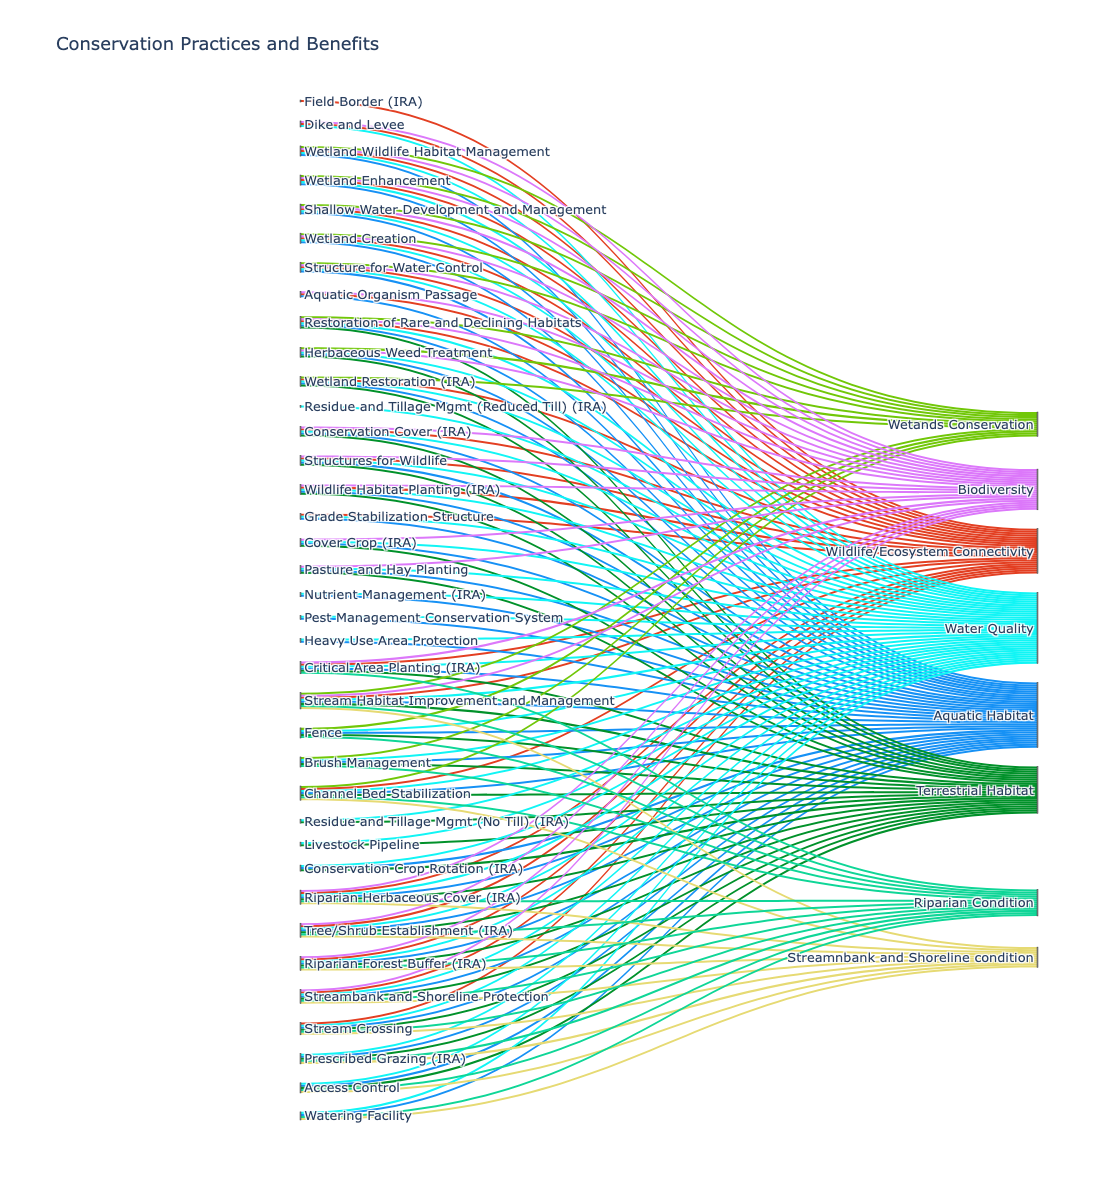

In [32]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      thickness = 1,
      color ='#8f8f8f',
      label = labels,
      hovertemplate='<extra></extra>',
    ),
    link = dict(
      source = long_data['source_idx'],
      target = long_data['target_idx'],
      value = long_data['value'],
      color = long_data['color'],
      hovertemplate = '%{source.label} benefits %{target.label}<extra></extra>',
  ))])

fig.update_layout(title_text="Conservation Practices and Benefits", font_size=13, height=1200, margin=dict(l=300))
js = '''
const TEXTPAD = 3; // constant used by Plotly.js

function sankeyNodeLabelsAlign(position, forcePos) {
  const textAnchor = {left: 'end', right: 'start', center: 'middle'}[position];
  const nodes = gd.getElementsByClassName('sankey-node');

  for (const node of nodes) {
    const d = node.__data__;
    const label = node.getElementsByClassName('node-label').item(0);

    // Ensure to reset any previous modifications
    label.setAttribute('x', 0);

    if (!d.horizontal)
      continue;

    // This is how Plotly's default text positioning is computed (coordinates
    // are relative to that of the cooresponding node).
    const padX = d.nodeLineWidth / 2 + TEXTPAD;
    const posX = padX + d.visibleWidth;
    let x;

    switch (position) {
      case 'left':
        if (d.left || d.node.originalLayer === 0 && !forcePos)
          continue;
        x = -posX - padX;
        break;

      case 'right':
        if (!d.left || !forcePos)
          continue;
        x = posX + padX;
        break;

      case 'center':
        if (!forcePos && (d.left || d.node.originalLayer === 0))
          continue;
        x = (d.nodeLineWidth + d.visibleWidth)/2 + (d.left ? padX : -posX);
        break;
    }

    label.setAttribute('x', x);
    label.setAttribute('text-anchor', textAnchor);
  }
}

const gd = document.getElementById('{plot_id}');
const position = 'left';
const forcePos = true;

gd.on('plotly_afterplot', sankeyNodeLabelsAlign.bind(gd, position, forcePos));
gd.emit('plotly_afterplot');
'''

fig.show(post_script=[js])

In [33]:
fig.write_html("sankey.html", post_script=[js])